In [7]:
import sys
import os

# Get the root directory of the project
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the root directory to the system path
sys.path.insert(0, project_root)

# Now you can import watermarking.utils
import watermarking.utils as utils

In [6]:
import pandas as pd 
import os
import json

import seaborn as sns
sns.set_theme()

In [9]:
nr_keys = 5
data_dir = "../data/output/different_keys_detected"
files_to_parse = os.listdir(data_dir)
data = []
for file in files_to_parse:
    filename = os.path.join(data_dir, file)
    with open(filename) as f:
        file_data = f.read()
        all_data = json.loads(file_data)
        data.append(all_data[:nr_keys * 1000])

flatten_data = [row for each_list in data[:nr_keys] for row in each_list]


In [10]:
def label_keys(df):
    for column_name in "detected_watermark_key", "generated_watermark_key":
        unique_keys = df[column_name].unique().tolist()
        unique_labels = [chr(ord("A") + x) for x in range(len(unique_keys))]
        key_label_dict = {k: v for k, v in zip(unique_keys, unique_labels)}
        df[column_name + "_label"] = df[column_name].apply(lambda x: key_label_dict[x])
    

<Axes: xlabel='detected_watermark_key_label', ylabel='z_score'>

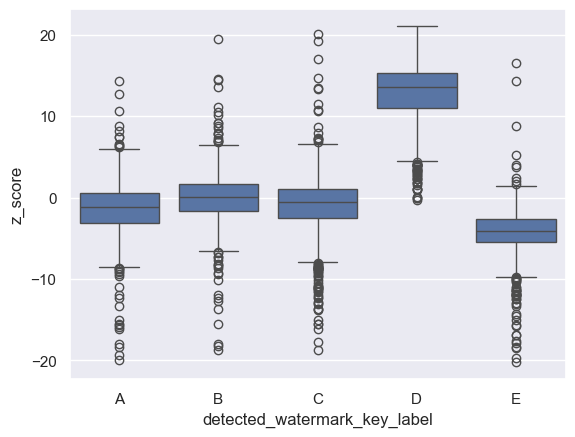

In [11]:
df = pd.DataFrame(data[3])
df

label_keys(df)
sns.boxplot(df, x="detected_watermark_key_label", y="z_score")

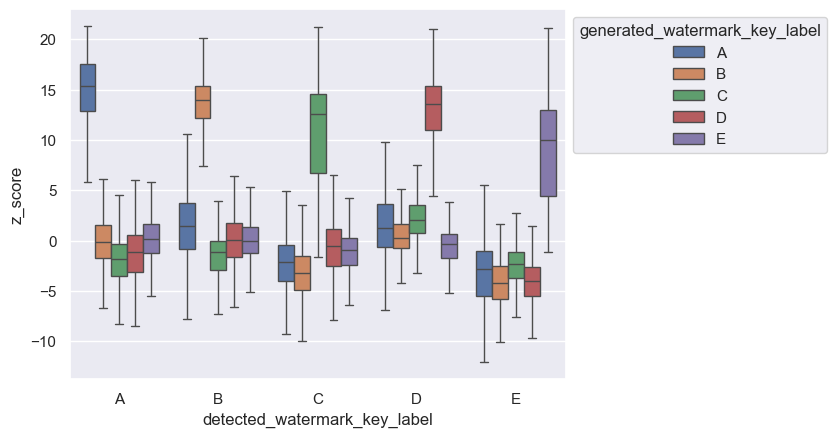

In [12]:
df = pd.DataFrame(flatten_data)
label_keys(df)

ax = sns.boxplot(df, x="detected_watermark_key_label", y="z_score", hue="generated_watermark_key_label",
           showfliers=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))